# Classification challenge

During next hours we will compete to build a classifier of natural scenes using a [dataset provided by NCTU](https://www.kaggle.com/c/cs-ioc5008-hw1/overview) (National Chiao Tung University, Taiwan).

[Leaderboard](https://www.kaggle.com/c/cs-ioc5008-hw1/leaderboard)

# Don't forget to configure the execution environment to run in GPU

## Download images from Google Drive

In [ ]:
# Import Google Drive libraries
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Authenticate with your Google Account
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Download the dataset of the challenge
download = drive.CreateFile({'id': '1DeEJ_LtbgIYPLYcPu3bD818iKXH_w8ru'})
download.GetContentFile('challenge.zip')

In [ ]:
# Extract the files
import zipfile
from pathlib import Path
data_path = Path("./challenge.zip")

with zipfile.ZipFile(str(data_path), 'r') as zip_ref:
    zip_ref.extractall("./data")

In [ ]:
ls

challenge.zip  data/  sample_data/


In [ ]:
ls data

test/  train/


In [ ]:
ls data/train

bedroom/  highway/     livingroom/  opencountry/  tallbuilding/
coast/    insidecity/  mountain/    street/
forest/   kitchen/     office/      suburb/


In [ ]:
ls data/train/bedroom

image_0000.jpg  image_0028.jpg  image_0056.jpg  image_0084.jpg  image_0112.jpg
image_0001.jpg  image_0029.jpg  image_0057.jpg  image_0085.jpg  image_0113.jpg
image_0002.jpg  image_0030.jpg  image_0058.jpg  image_0086.jpg  image_0114.jpg
image_0003.jpg  image_0031.jpg  image_0059.jpg  image_0087.jpg  image_0115.jpg
image_0004.jpg  image_0032.jpg  image_0060.jpg  image_0088.jpg  image_0116.jpg
image_0005.jpg  image_0033.jpg  image_0061.jpg  image_0089.jpg  image_0117.jpg
image_0006.jpg  image_0034.jpg  image_0062.jpg  image_0090.jpg  image_0118.jpg
image_0007.jpg  image_0035.jpg  image_0063.jpg  image_0091.jpg  image_0119.jpg
image_0008.jpg  image_0036.jpg  image_0064.jpg  image_0092.jpg  image_0120.jpg
image_0009.jpg  image_0037.jpg  image_0065.jpg  image_0093.jpg  image_0121.jpg
image_0010.jpg  image_0038.jpg  image_0066.jpg  image_0094.jpg  image_0122.jpg
image_0011.jpg  image_0039.jpg  image_0067.jpg  image_0095.jpg  image_0123.jpg
image_0012.jpg  image_0040.jpg  image_0068.jpg  imag

In [ ]:
ls data/test

image_0000.jpg  image_0208.jpg  image_0416.jpg  image_0624.jpg  image_0832.jpg
image_0001.jpg  image_0209.jpg  image_0417.jpg  image_0625.jpg  image_0833.jpg
image_0002.jpg  image_0210.jpg  image_0418.jpg  image_0626.jpg  image_0834.jpg
image_0003.jpg  image_0211.jpg  image_0419.jpg  image_0627.jpg  image_0835.jpg
image_0004.jpg  image_0212.jpg  image_0420.jpg  image_0628.jpg  image_0836.jpg
image_0005.jpg  image_0213.jpg  image_0421.jpg  image_0629.jpg  image_0837.jpg
image_0006.jpg  image_0214.jpg  image_0422.jpg  image_0630.jpg  image_0838.jpg
image_0007.jpg  image_0215.jpg  image_0423.jpg  image_0631.jpg  image_0839.jpg
image_0008.jpg  image_0216.jpg  image_0424.jpg  image_0632.jpg  image_0840.jpg
image_0009.jpg  image_0217.jpg  image_0425.jpg  image_0633.jpg  image_0841.jpg
image_0010.jpg  image_0218.jpg  image_0426.jpg  image_0634.jpg  image_0842.jpg
image_0011.jpg  image_0219.jpg  image_0427.jpg  image_0635.jpg  image_0843.jpg
image_0012.jpg  image_0220.jpg  image_0428.jpg  imag

# Let's hack some code!

# Explore the data

# Experiment

In [ ]:
# Import fastai
from fastai.vision import *

In [ ]:
# Load data
batch_size = 32
size = 224
data = ImageDataBunch.from_folder(path='./data', train="train", test="test", 
                                  valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=size, 
                                  bs=batch_size
                                  ).normalize(imagenet_stats)

In [ ]:
# Initialize learner
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


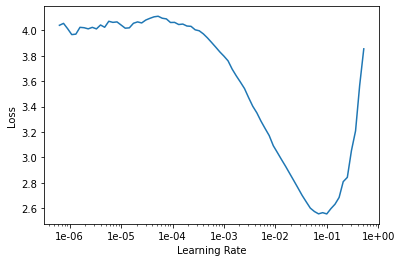

In [ ]:
# Find optimum learning rate
learn.lr_find()
learn.recorder.plot()

In [ ]:
# Set learning rate
lr = 1e-2

In [ ]:
# Train 5 epochs
learn.fit_one_cycle(5, max_lr=slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.138574,2.093339,0.637655,00:16
1,1.179169,0.902773,0.749556,00:15
2,0.891262,0.716464,0.813499,00:15
3,0.573578,0.356037,0.889876,00:15
4,0.335071,0.289134,0.898757,00:15


In [ ]:
# Save model
learn.save("score-3733")

In [ ]:
# Unfreeze conv layers
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


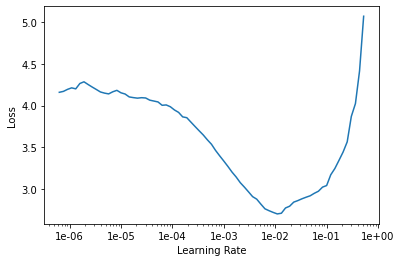

In [ ]:
# Find learning rate
learn.lr_find()
learn.recorder.plot()

intento 2

In [ ]:
# Load data
batch_size = 64
size = 448
data = ImageDataBunch.from_folder(path='./data', train="train", test="test", 
                                  valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=size, 
                                  bs=batch_size
                                  ).normalize(imagenet_stats)

In [ ]:
# Initialize learner
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


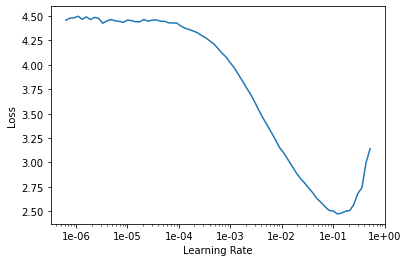

In [ ]:
# Find optimum learning rate
learn.lr_find()
learn.recorder.plot()

In [ ]:
# Set learning rate
lr = 1e-2

In [ ]:
# Train 5 epochs
learn.fit_one_cycle(5, max_lr=slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.444492,1.553240,0.644760,00:47
1,0.929706,0.456734,0.865009,00:47
2,0.674443,0.417360,0.872114,00:47
3,0.498549,0.321472,0.898757,00:46
4,0.383889,0.268163,0.909414,00:46


In [ ]:
# Train 5 epochs
learn.fit_one_cycle(7, max_lr=slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.242285,0.262767,0.907638,00:46
1,0.266399,0.390510,0.902309,00:46
2,0.326380,0.371641,0.893428,00:46
3,0.335833,0.366031,0.907638,00:45
4,0.301270,0.258418,0.928952,00:45
5,0.252528,0.258756,0.927176,00:45
6,0.206542,0.255745,0.930728,00:45


In [ ]:
# Save model
learn.save("score-9307")

In [ ]:
# Unfreeze conv layers
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


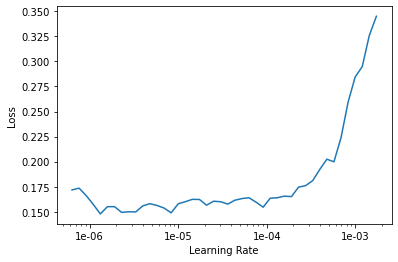

In [ ]:
# Find learning rate
learn.lr_find()
learn.recorder.plot()

In [ ]:
# Train 5 epochs
learn.fit_one_cycle(8, max_lr=slice(lr/100,lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.256123,0.389518,0.896980,00:49
1,0.557750,4.481598,0.612789,00:48
2,0.588335,1.412521,0.749556,00:48
3,0.544094,0.441300,0.886323,00:48
4,0.399826,0.337166,0.927176,00:48
5,0.288645,0.261465,0.928952,00:47
6,0.195119,0.202577,0.943162,00:47
7,0.125578,0.185430,0.936057,00:48


# otro intento

In [ ]:
# Load data
batch_size = 16
size = 448
data = ImageDataBunch.from_folder(path='./data', train="train", test="test", 
                                  valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=size, 
                                  bs=batch_size
                                  ).normalize(imagenet_stats)

In [ ]:
# Initialize learner
learn = cnn_learner(data, models.densenet201, metrics=accuracy)

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


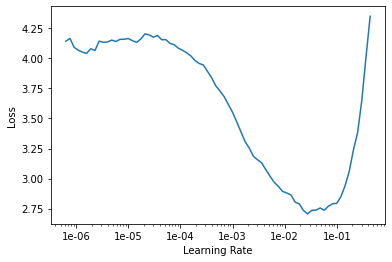

In [ ]:
# Find optimum learning rate
learn.lr_find()
learn.recorder.plot()

In [ ]:
# Set learning rate
lr = 1e-2

In [ ]:
# Train 5 epochs
learn.fit_one_cycle(8, max_lr=slice(lr/100,lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.942183,0.433745,0.868561,02:00
1,0.862123,0.760196,0.827709,01:57
2,0.807715,0.533355,0.893428,01:57
3,0.523980,0.269373,0.923623,01:56
4,0.447869,0.259693,0.928952,01:57
5,0.318021,0.222709,0.930728,01:56
6,0.199799,0.179246,0.955595,01:56
7,0.121565,0.160015,0.960924,01:57


In [ ]:
# Save model
learn.save("score-9609")